In [4]:
import scanpy as sc
from genevector.data import GeneVectorDataset
from genevector.model import GeneVector
from genevector.embedding import GeneEmbedding, CellEmbedding
import gdown
import os

sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.0 pandas==1.5.1 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7


# Load Spectrum Data and Embedding

In [17]:
url = "https://drive.google.com/uc?id=1alYWBGAa72jWpf7XFkeWOYEFgRnijpEs"
output = 'specfull.h5ad'
if not os.path.exists("specfull.h5ad"):
    gdown.download(url, output, quiet=False)

adata = sc.read("specfull.h5ad")

/Users/ceglian/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [18]:
import yaml
with open("references/hgsc_v7_major.yaml", "r") as file:
    markers = yaml.safe_load(file)
amarkers = []
for ct, gns in markers.items():
    amarkers+=gns

In [ ]:
dataset = GeneVectorDataset(adata)

Loading Expression.


 47%|██████████████████████████████████████████████████▌                                                        | 41430572/87772271 [06:34<07:29, 103067.91it/s]

In [8]:
retrain = False
if retrain:
    cmps = GeneVector(dataset,
                      output_file="spectrum_all_samples.vec",
                      batch_size=100000000,
                      c=100.,
                      emb_dimension=100)
    cmps.train(10000,threshold=1e-8)
    cmps.plot()

Generating inputs and outputs.


  0%|▏                                                                                                                   | 757/538203 [00:00<06:40, 1342.43it/s]/Users/ceglian/miniconda3/lib/python3.9/site-packages/numpy/lib/histograms.py:1124: RuntimeWarning: invalid value encountered in true_divide
  hist /= s
100%|█████████████████████████████████████████████████████████████████████████████████████████| 1060/1060 [00:00<00:00, 1914.43it/s]


In [9]:
embed = GeneEmbedding("embeddings/spectrum_all_samples.vec", dataset,vector="average")

Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████| 1060/1060 [00:00<00:00, 2330168.89it/s]


normalizing counts per cell
    finished (0:00:00)
Loading Expression.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 270833/270833 [01:47<00:00, 2520.25it/s]


computing neighbors


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:52)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:03:02)


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


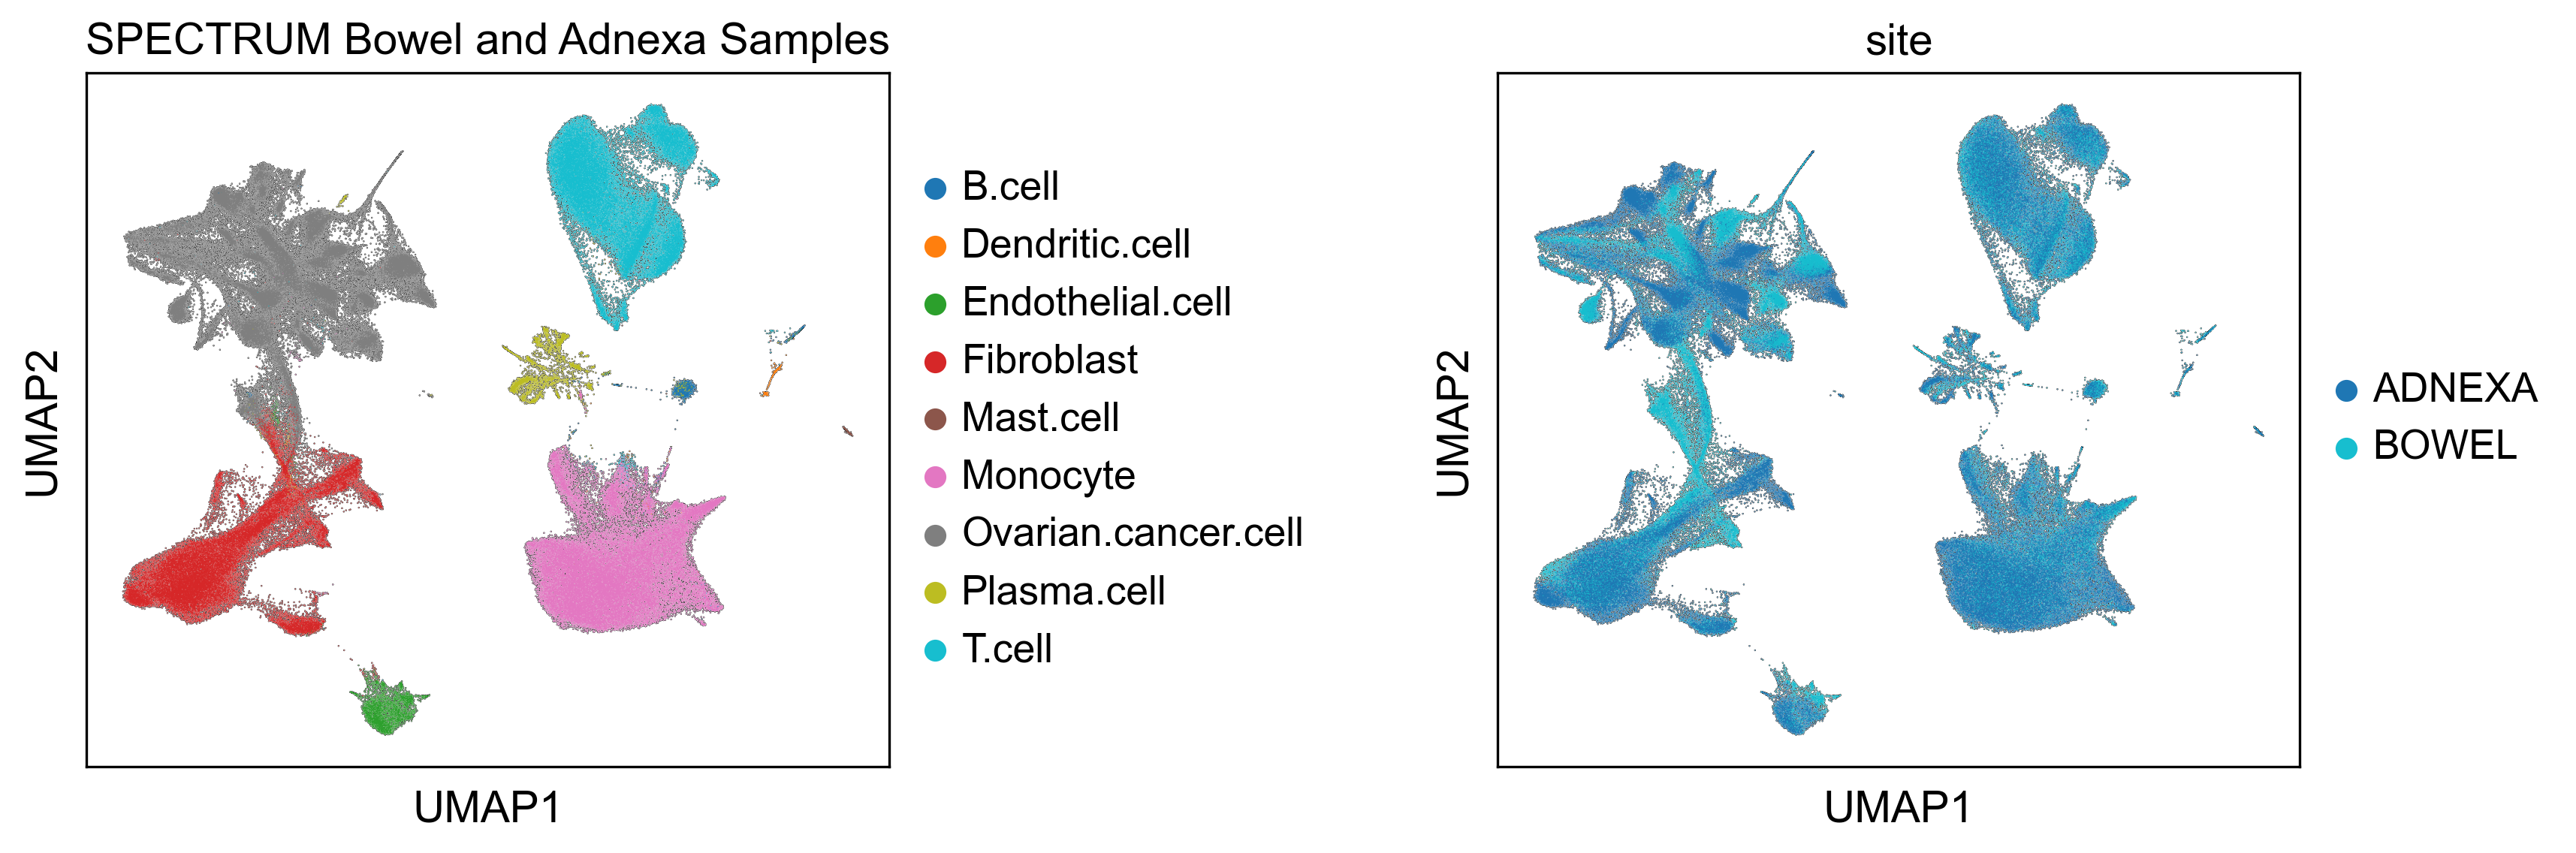

In [87]:
cembed = CellEmbedding(dataset, embed)
adata = cembed.get_adata()
sc.pl.umap(adata,palette="tab10",color=["author_cell_type","site"],
           title=["SPECTRUM Bowel and Adnexa Samples"],add_outline=True,wspace=0.6)

In [38]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [ ]:
#     def phenotype_probability(self, adata, up_phenotype_markers, down_phenotype_markers, target_col="genevector"):
#         mapped_components = dict(zip(list(self.data.keys()),self.matrix))
#         vkeys = set(self.data.keys()).intersection(set(adata.obs.index.tolist()))
#         adata = adata[list(vkeys)]
#         probs = dict()
#         hidden_d = len(list(embed.embeddings.values())[0])
#         def generate_weighted_vector(self, genes, markers, weights):
#             vector = []
#             weight = []
#             for gene, vec in zip(self.genes, self.vector):
#                 if gene in genes and gene in weights:
#                     vector.append(weights[gene] * numpy.array(vec))
#             if len(vector) != hidden_d:
#                 vec = list(numpy.zeros(100))
#             else:
#                 vec = list(numpy.sum(vector, axis=0))
#             return vec

#         amarkers = []
#         for _, genes in up_phenotype_markers.items():
#             amarkers += genes
#         for _, genes in down_phenotype_markers.items():
#             amarkers += genes
#         amarkers = list(set(amarkers))
#         dataset_vector = numpy.average(self.matrix,axis=0)
#         for pheno, markers in up_phenotype_markers.items():
#             dists = []
#             for x in tqdm.tqdm(adata.obs.index):
#                 weights = self.normalized_expression[x]
#                 vector = generate_weighted_vector(self.embed, markers, amarkers, weights)
#                 if sum(vector) == 0.:
#                     dists.append(0.)
#                 else:
#                     dist = 1. - distance.cosine(mapped_components[x], numpy.array(vector))
#                     dists.append(dist)
#             probs[pheno] = dists
#         distribution = []
#         celltypes = []
#         for k, v in probs.items():
#             distribution.append(v)
#             celltypes.append(k)
#         distribution = list(zip(*distribution))
#         classif = []
#         probabilities = []
#         probabilities = softmax(numpy.array(distribution),axis=1)
#         for ct in probabilities:
#             assign = celltypes[numpy.argmax(ct)]
#             classif.append(assign)
#         res = {"distances":distribution, "order":celltypes, "probabilities":probabilities}
#         barcode_to_label = dict(zip(list(self.data.keys()), res["probabilities"]))
#         ct = []
#         probs = collections.defaultdict(list)
#         for x in adata.obs.index:
#             if x not in barcode_to_label:
#                 ct.append("Unknown")
#                 for ph in res["order"]:
#                     probs[ph].append(0.)
#                 continue
#             ctx = res["order"][numpy.argmax(barcode_to_label[x])]
#             ct.append(ctx)
#             for ph, pb in zip(res["order"],barcode_to_label[x]):
#                 probs[ph].append(pb)
#         adata.obs[target_col] = ct

#         def load_predictions(adata,probs):
#             for ph in probs.keys():
#                 print(ph)
#                 adata.obs[ph+" Pseudo-probability"] = probs[ph]
#             return adata
#         adata = load_predictions(adata,probs)
#         return adata


In [43]:
with open("hgsc_v7_major.yaml", "r") as file:
    markers = yaml.safe_load(file)
annotated_adata = phenotype_probability(cembed, xdata,markers)

100%|████████████████████████████████████████████████████████████████████████████████████| 270833/270833 [00:20<00:00, 13286.16it/s]
/var/folders/38/rslqw81d2rx5jfmt2pc_dmnhd336fz/T/ipykernel_33306/2202117402.py:65: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[target_col] = ct


B.cell


100%|████████████████████████████████████████████████████████████████████████████████████| 240740/240740 [00:17<00:00, 13387.88it/s]
/var/folders/38/rslqw81d2rx5jfmt2pc_dmnhd336fz/T/ipykernel_33306/2202117402.py:65: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[target_col] = ct


B.cell


100%|████████████████████████████████████████████████████████████████████████████████████| 187242/187242 [00:14<00:00, 13368.93it/s]
/var/folders/38/rslqw81d2rx5jfmt2pc_dmnhd336fz/T/ipykernel_33306/2202117402.py:65: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[target_col] = ct


B.cell


100%|████████████████████████████████████████████████████████████████████████████████████| 124828/124828 [00:09<00:00, 13213.80it/s]
/var/folders/38/rslqw81d2rx5jfmt2pc_dmnhd336fz/T/ipykernel_33306/2202117402.py:65: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[target_col] = ct


B.cell


100%|██████████████████████████████████████████████████████████████████████████████████████| 69348/69348 [00:05<00:00, 13392.46it/s]
/var/folders/38/rslqw81d2rx5jfmt2pc_dmnhd336fz/T/ipykernel_33306/2202117402.py:65: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[target_col] = ct


B.cell


100%|██████████████████████████████████████████████████████████████████████████████████████| 30821/30821 [00:02<00:00, 13254.53it/s]
/var/folders/38/rslqw81d2rx5jfmt2pc_dmnhd336fz/T/ipykernel_33306/2202117402.py:65: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[target_col] = ct


B.cell


100%|██████████████████████████████████████████████████████████████████████████████████████| 10273/10273 [00:00<00:00, 13150.64it/s]
/var/folders/38/rslqw81d2rx5jfmt2pc_dmnhd336fz/T/ipykernel_33306/2202117402.py:65: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[target_col] = ct


B.cell


100%|████████████████████████████████████████████████████████████████████████████████████████| 2282/2282 [00:00<00:00, 13063.96it/s]
/var/folders/38/rslqw81d2rx5jfmt2pc_dmnhd336fz/T/ipykernel_33306/2202117402.py:65: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[target_col] = ct


B.cell


100%|██████████████████████████████████████████████████████████████████████████████████████████| 253/253 [00:00<00:00, 12725.10it/s]
/var/folders/38/rslqw81d2rx5jfmt2pc_dmnhd336fz/T/ipykernel_33306/2202117402.py:65: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[target_col] = ct


B.cell


0it [00:00, ?it/s]


AxisError: axis 1 is out of bounds for array of dimension 1

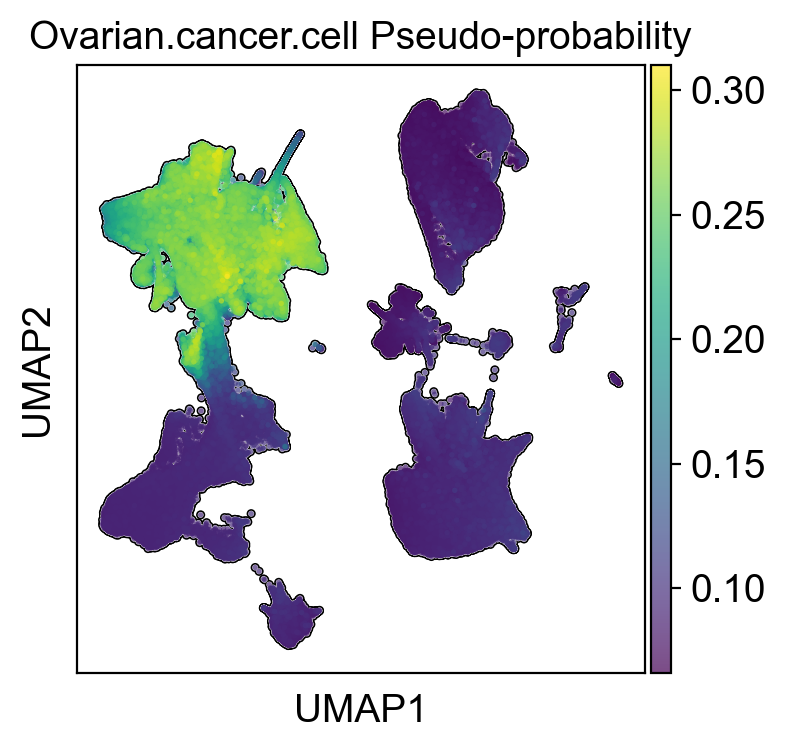

In [63]:
sc.pl.umap(annotated_adata,
           color=["Ovarian.cancer.cell Pseudo-probability"],
           size=15,add_outline=True,save="prob.pdf")

In [64]:
adata = annotated_adata[annotated_adata.obs["genevector"]=="Ovarian.cancer.cell"]
adata

View of AnnData object with n_obs × n_vars = 84699 × 1060
    obs: 'percent.mt', 'percent.rb', 'doublet', 'author_sample_id', 'S.Score', 'G2M.Score', 'Phase', 'CC.Diff', 'author_cell_type', 'nCount_RNA', 'nFeature_RNA', 'doublet_score', 'cell_id', 'organism_ontology_term_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'suspension_type', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'author_tumor_supersite', 'author_tumor_site', 'author_tumor_subsite', 'author_sort_parameters', 'author_therapy', 'author_procedure', 'author_procedure_type', 'is_primary_data', 'site', 'genevector', 'B.cell Pseudo-probability', 'Dendritic.cell Pseudo-probability', 'Endothelial.cell Pseudo-probability', 'Fibroblast Pseudo-probability', 'Monocyte Pseudo-probability', 'Ovarian.cancer.cell Pseudo-probability', 'Plasma.cell Pseudo-probability', 'T.cell Pseudo-probability', 'Mast.cell Pse

In [65]:
save = False
if save:
    adata.write("cancer_spectrum.h5ad")

In [50]:
ct = []
for x in adata.obs['author_cell_type']:
    if x in ["Dendritic.cell","Mast.cell"]:
        ct.append("Other")
    else:
        ct.append(x)
adata.obs["celltype"] = ct

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)
B.cell ['HLA-DRA', 'MS4A1', 'CD79A', 'CD52', 'HLA-DPA1']
T.cell ['CD2', 'CD52', 'IL32', 'SRGN', 'CD3D']
Plasma.cell ['IGHG1', 'MZB1', 'IGHG3', 'IGKC', 'JCHAIN']
Dendritic.cell ['HLA-DRA', 'JCHAIN', 'GZMB', 'PLD4', 'GPR183']
Ovarian.cancer.cell ['KRT18', 'KRT8', 'WFDC2', 'EPCAM', 'CLDN3']
Mast.cell ['TPSAB1', 'CPA3', 'SRGN', 'HPGDS', 'TPSB2']
Fibroblast ['COL3A1', 'COL1A2', 'COL1A1', 'SPARC', 'COL6A2']
Endothelial.cell ['IGFBP7', 'VWF', 'HSPG2', 'SPARCL1', 'A2M']
Monocyte ['TYROBP', 'FCER1G', 'AIF1', 'HLA-DRA', 'CD68']
{'B.cell': ['MS4A1', 'CD79A', 'CD52', 'HLA-DPA1', 'IGKC', 'HLA-DRA', 'IGLC2'], 'T.cell': ['C

100%|██████████| 270833/270833 [00:03<00:00, 85450.16it/s]
/var/folders/38/rslqw81d2rx5jfmt2pc_dmnhd336fz/T/ipykernel_58120/1929946466.py:47: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[target_col] = ct
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


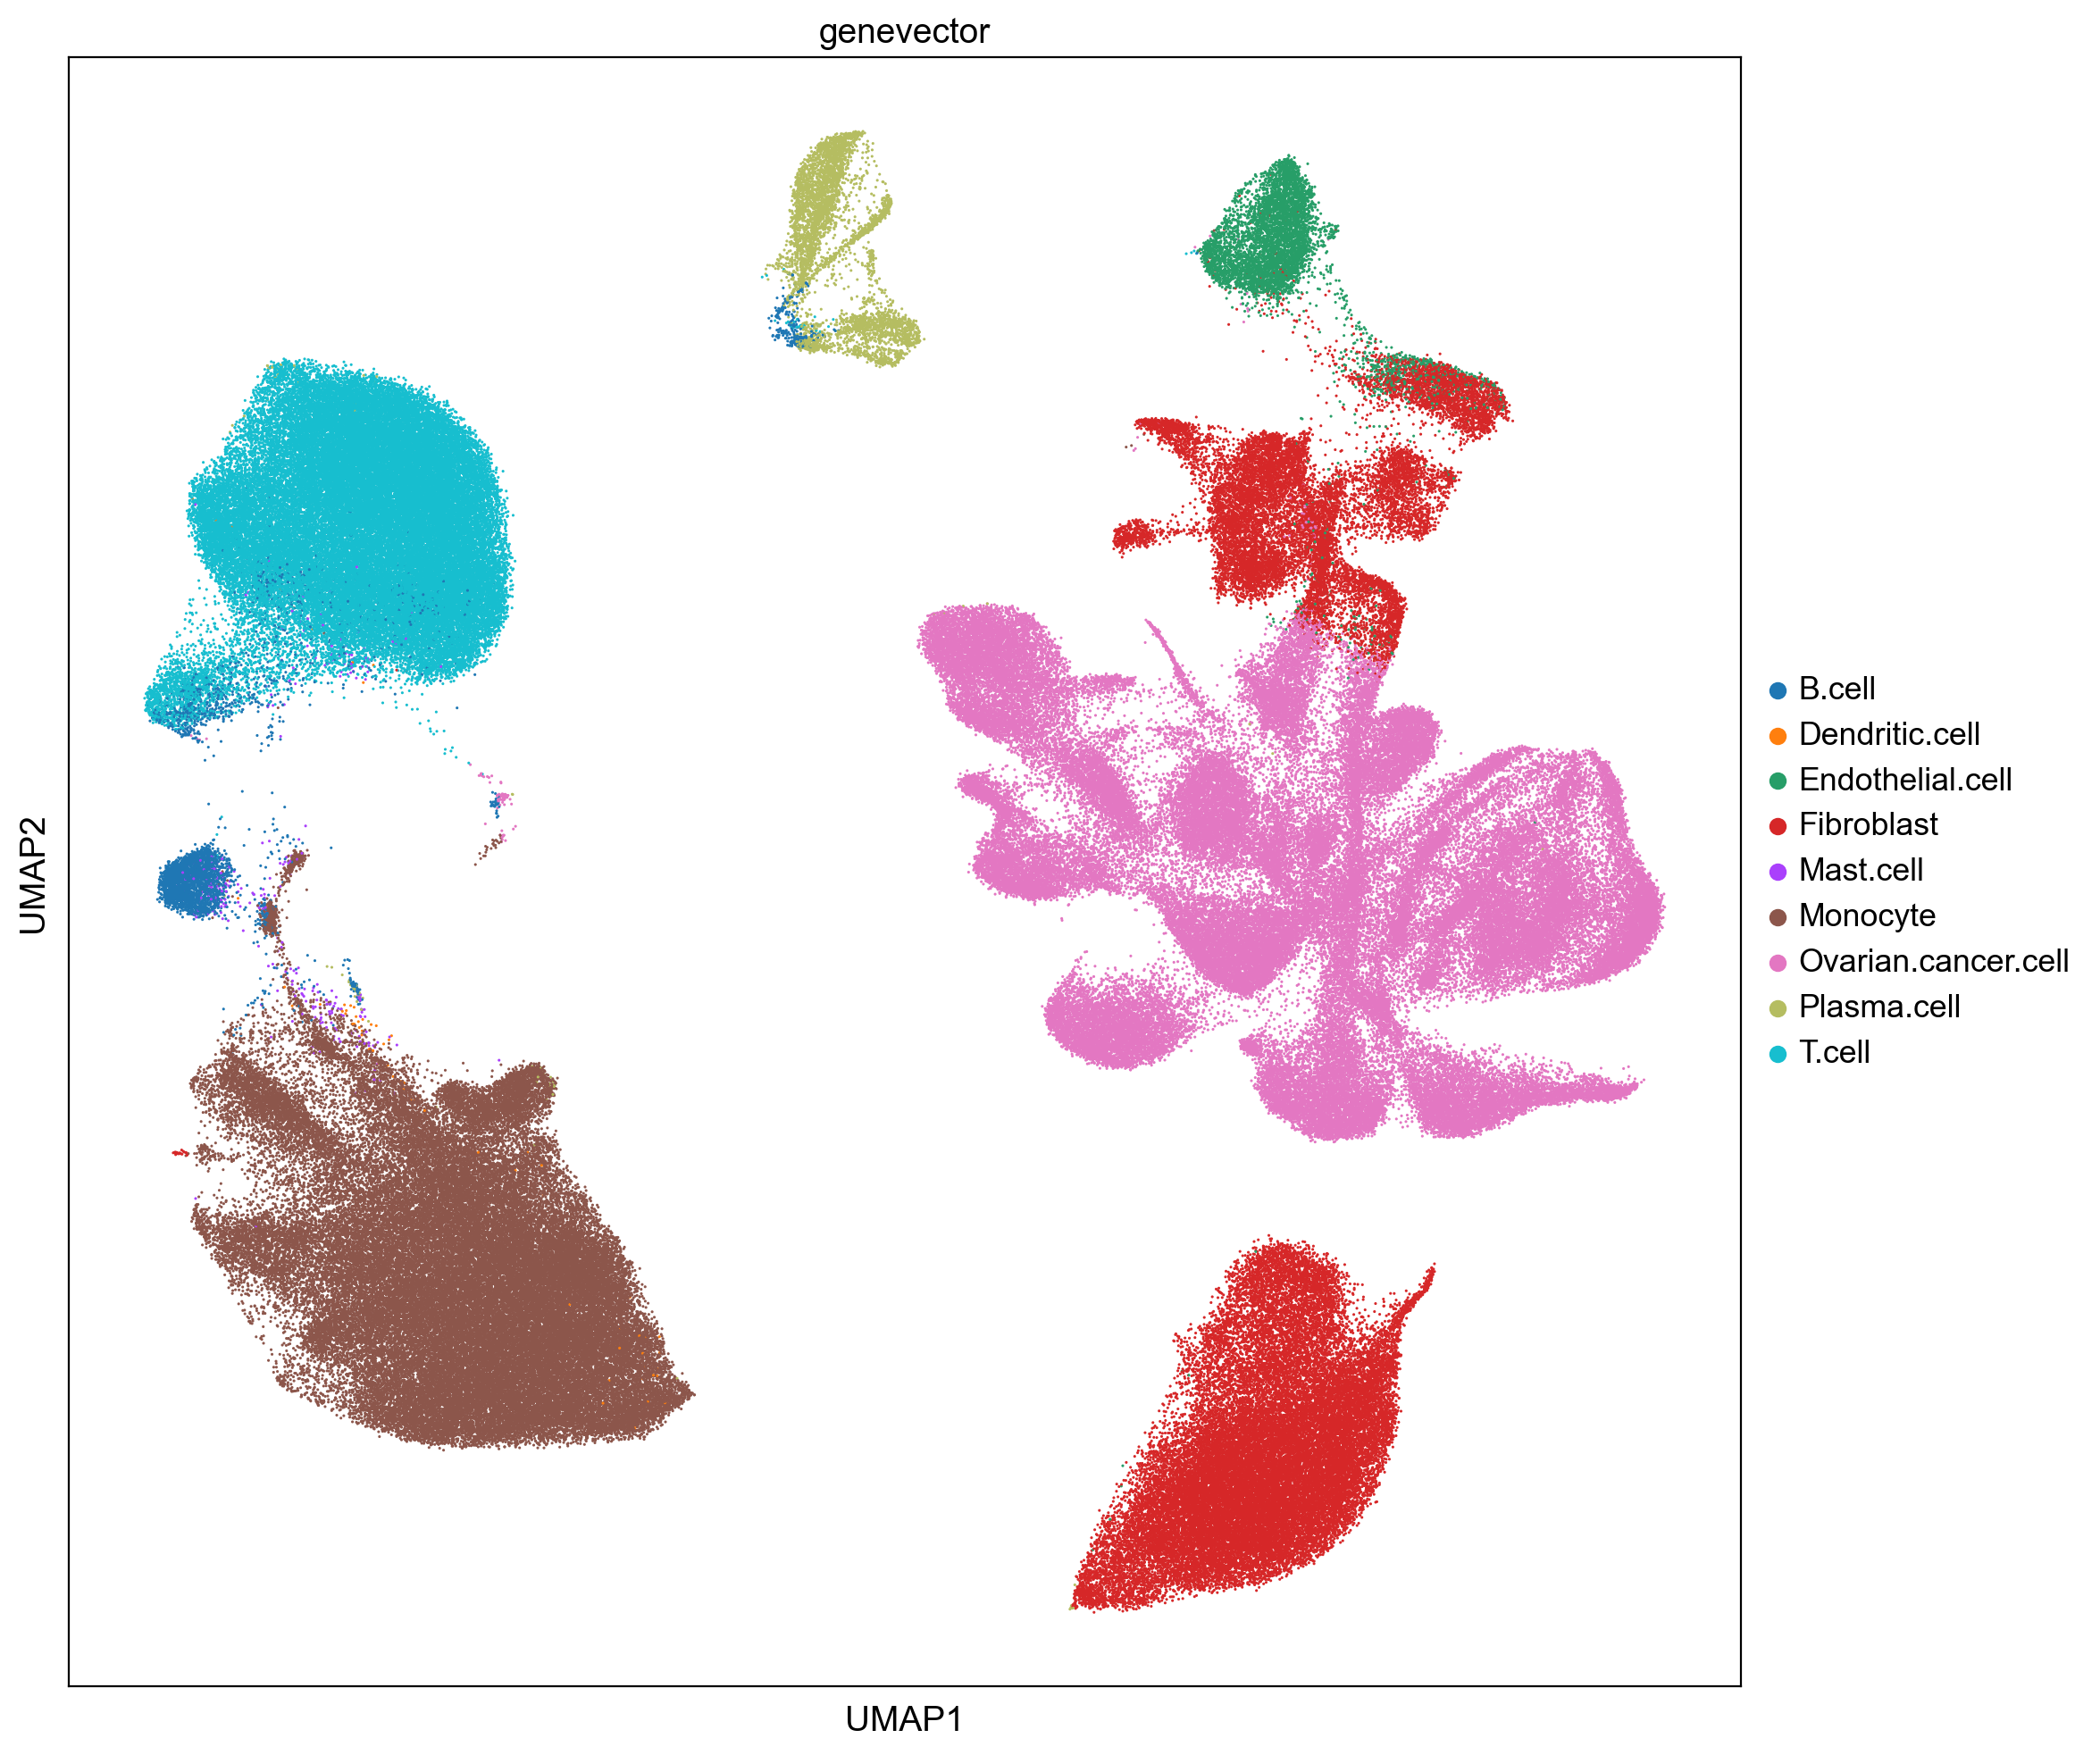

In [503]:
sc.tl.rank_genes_groups(adata,"author_cell_type")

markers = dict()
for x in set(adata.obs["author_cell_type"]):
    df = sc.get.rank_genes_groups_df(adata,x)
    markers[x] = df['names'].tolist()[:5]
    print(x,markers[x])

markers["Ovarian.cancer.cell"] = ["EPCAM","CD24"]
markers["Fibroblast"] = ['COL3A1', 'COL1A2', 'COL1A1', 'SPARC', 'COL6A2',"MGP","COL4A2"]
markers['T.cell'] =  ['CD3E', 'CD3G', 'CD3D',"TUBA1B"]
markers['B.cell'] =  ['MS4A1', 'CD79A', 'CD52', 'HLA-DPA1','IGKC',"HLA-DRA","IGLC2"]
markers['Mast.cell'] =  ['CPA3','SRGN']
markers['Plasma.cell'] = ['IGHG1', 'MZB1', 'IGHG3',"JCHAIN","IGKC","IGHG2"]

print(markers)
negative_markers = dict()
negative_markers["Mast.cell"] = ["TYROBP"]

annotated_adata = phenotype_probability(cembed, adata,markers,dict())
prob_cols = [x for x in annotated_adata.obs.columns.tolist() if "Pseudo-probability" in x]

fig,ax = plt.subplots(1,1,figsize=(12,12))
sc.pl.umap(annotated_adata,color=["genevector"],size=5,ax=ax)

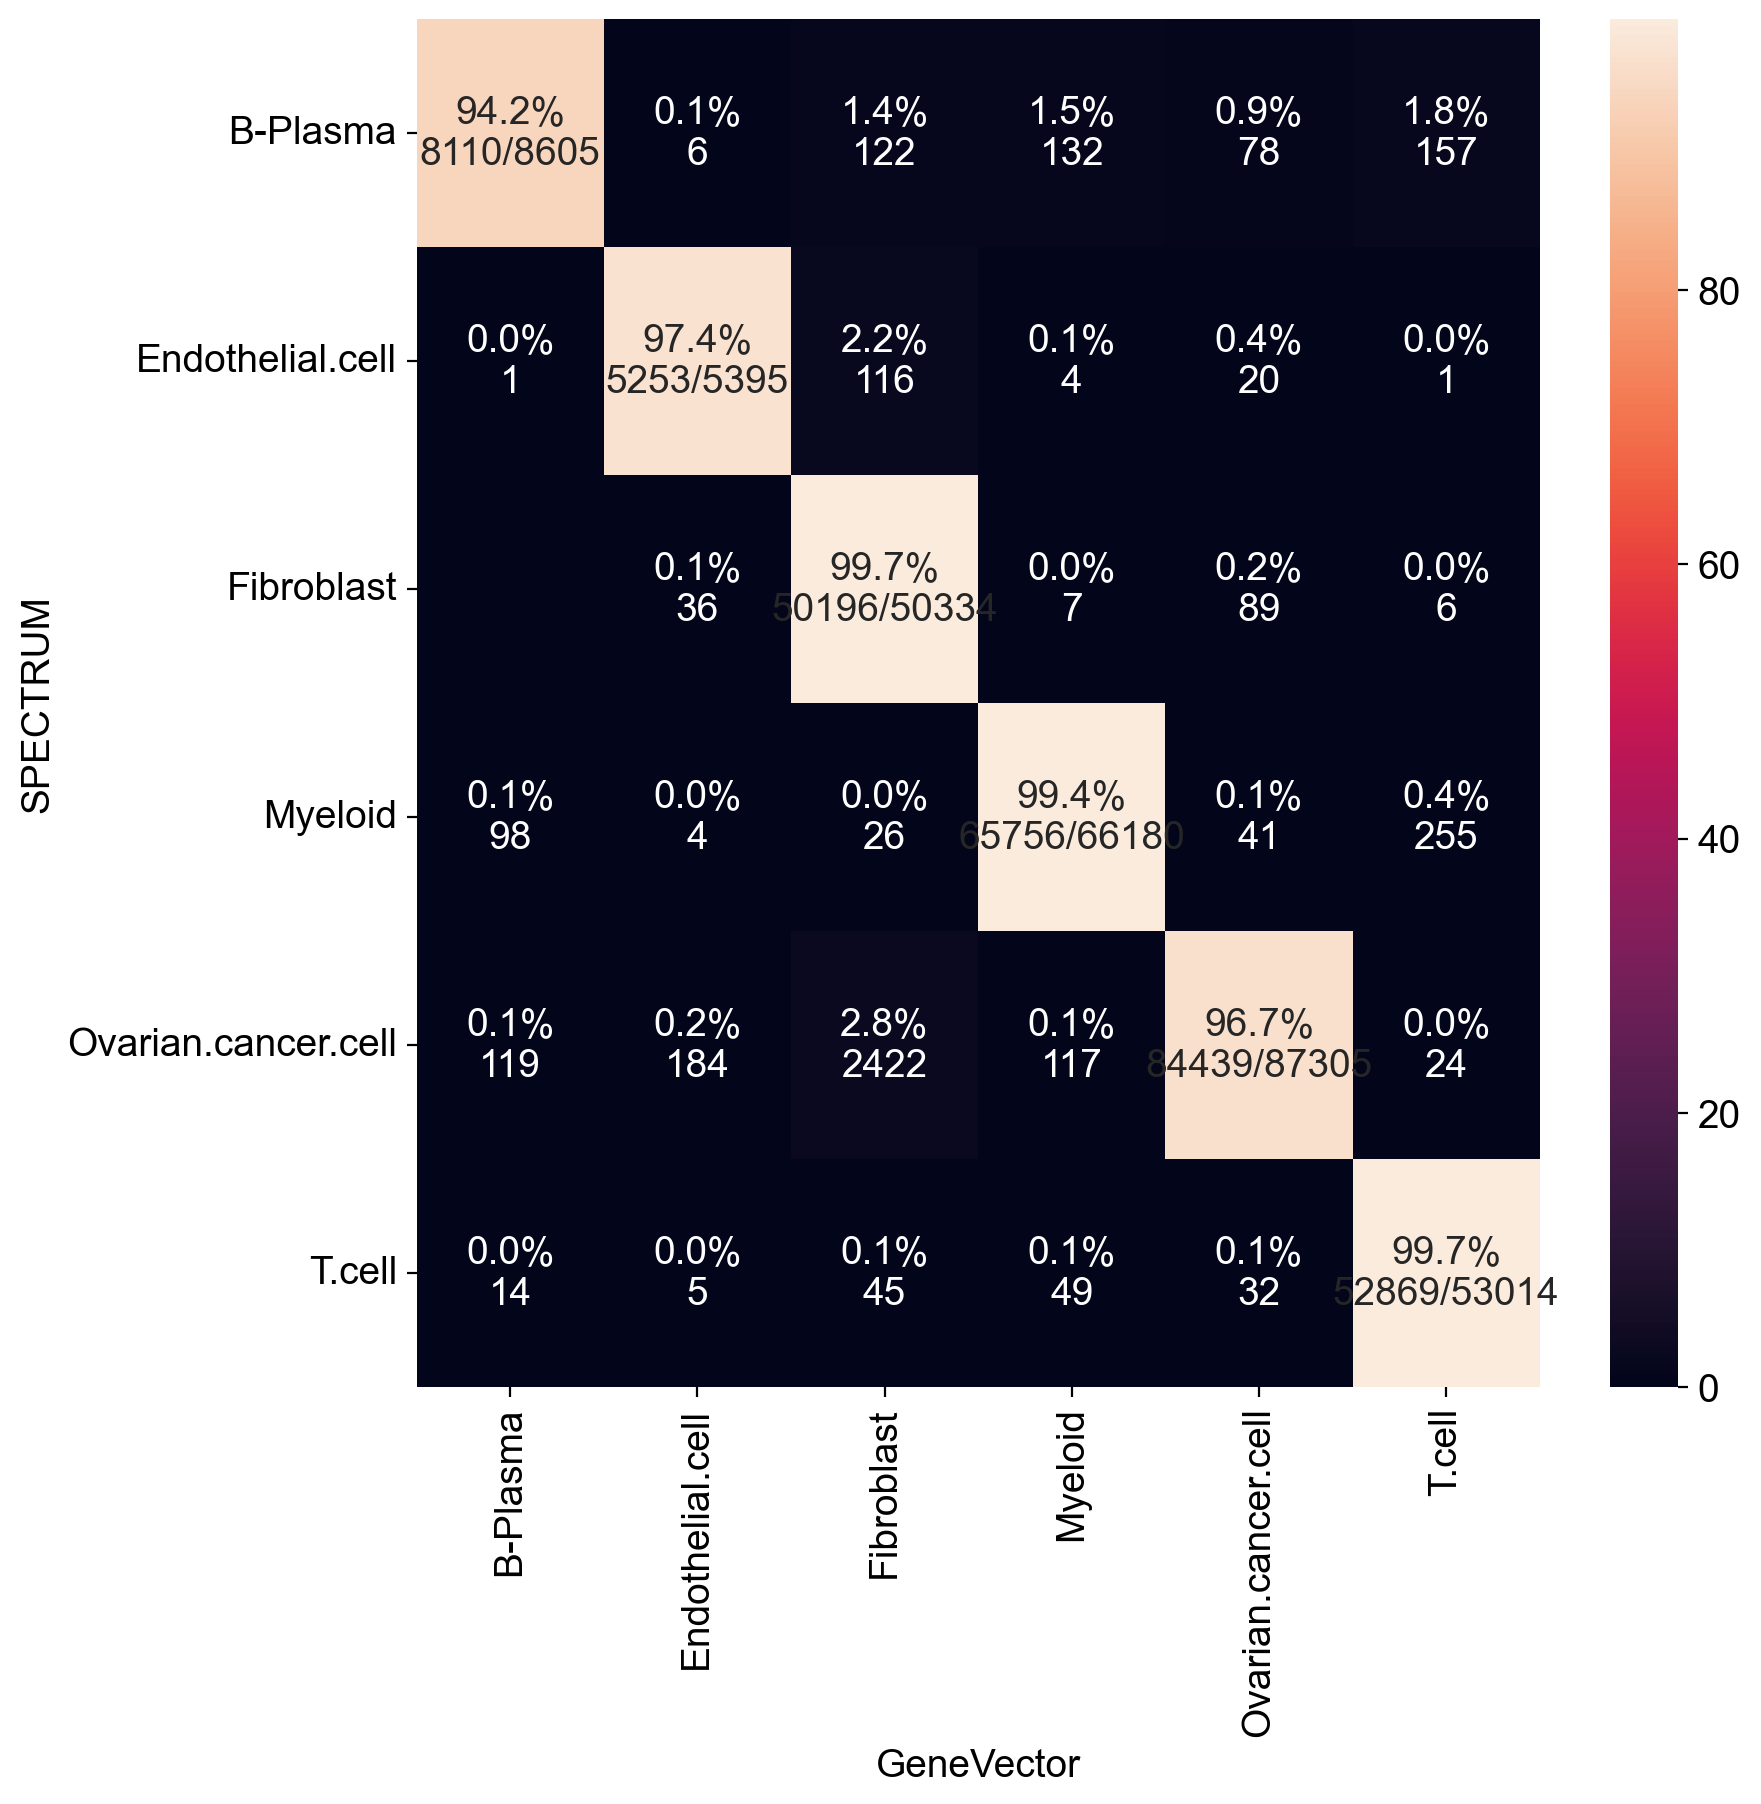

In [31]:
ct = []
for x in annotated_adata.obs["genevector"]:
    if x in ["Dendritic.cell","Mast.cell","Monocyte"]:
        ct.append("Myeloid")
    elif x in ["B.cell","Plasma.cell"]:
        ct.append("B-Plasma")
    else:
        ct.append(x)
annotated_adata.obs["genevector"] = ct

ct = []
for x in annotated_adata.obs["author_cell_type"]:
    if x in ["Dendritic.cell","Mast.cell","Monocyte"]:
        ct.append("Myeloid")
    elif x in ["B.cell","Plasma.cell"]:
        ct.append("B-Plasma")
    else:
        ct.append(x)
annotated_adata.obs["celltype"] = ct

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

gv_ct = annotated_adata.obs["genevector"].tolist()
ca_ct = annotated_adata.obs["celltype"].tolist()
def plot_cm(y_true, y_pred, figsize=(9,9)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm_perc, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'SPECTRUM'
    cm.columns.name = 'GeneVector'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    plt.savefig("/Users/ceglian/spectrum_acc.pdf")

plot_cm(ca_ct,gv_ct)



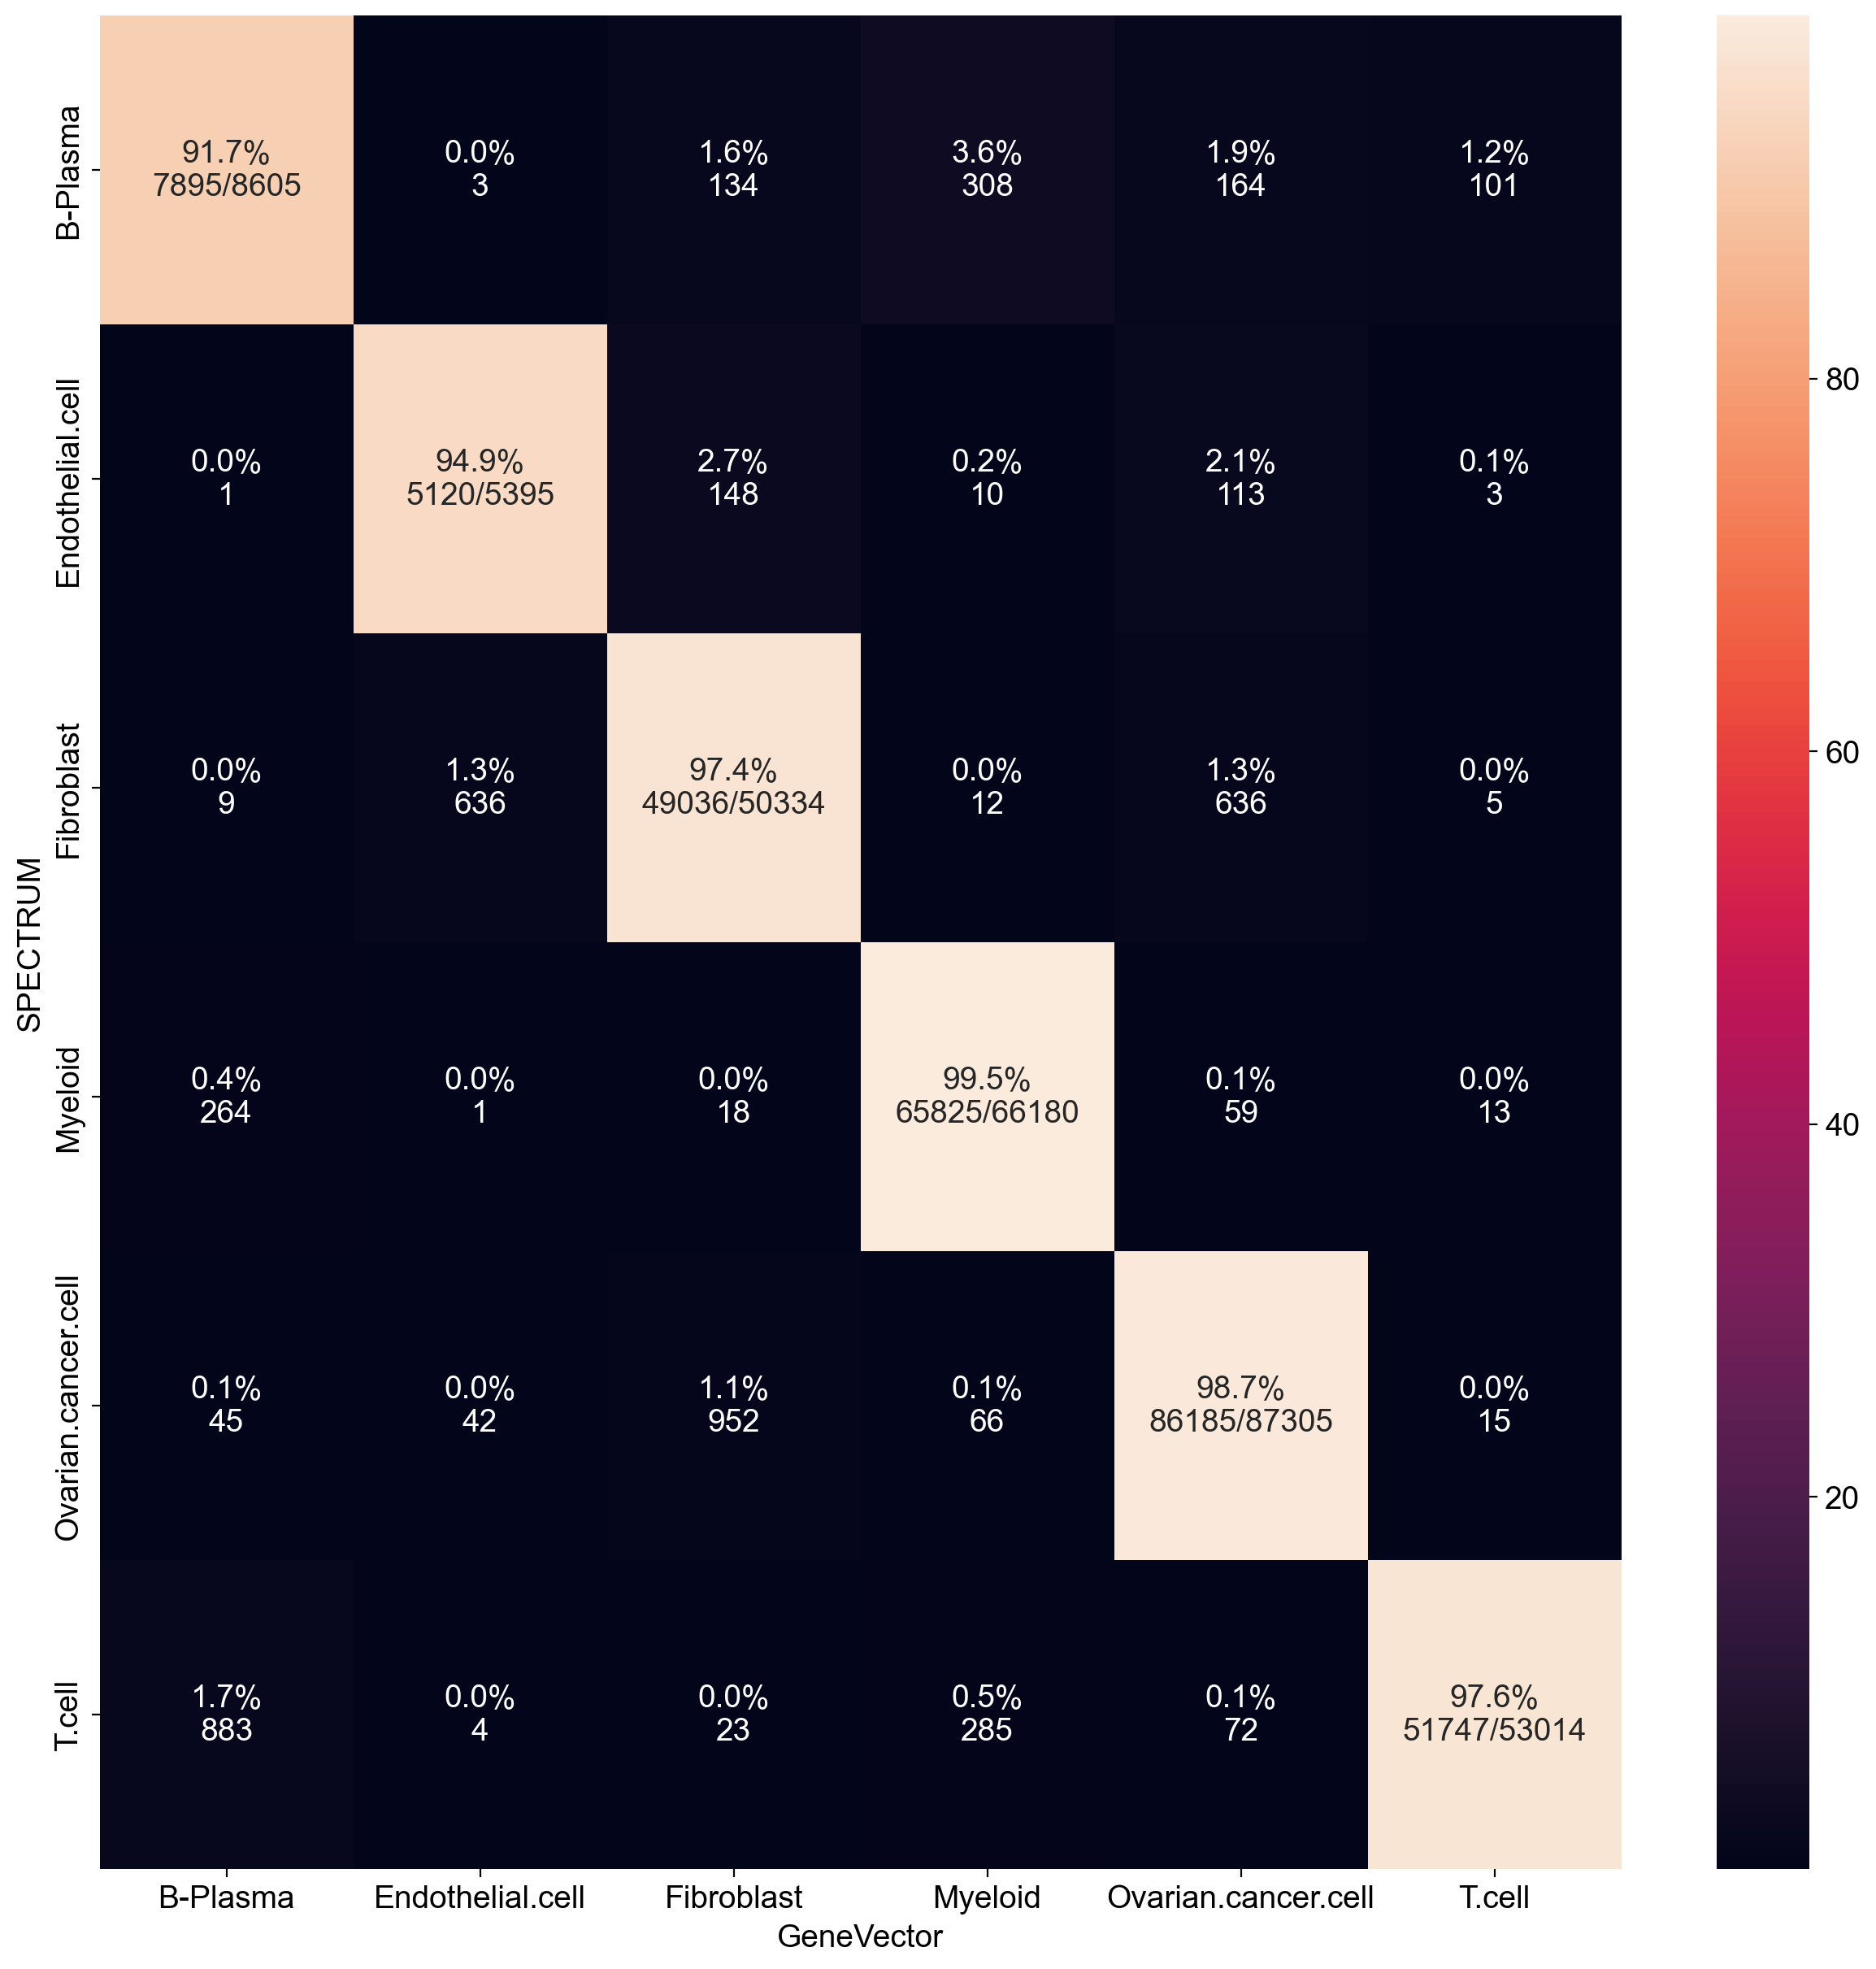

In [504]:
ct = []
for x in annotated_adata.obs["genevector"]:
    if x in ["Dendritic.cell","Mast.cell","Monocyte"]:
        ct.append("Myeloid")
    elif x in ["B.cell","Plasma.cell"]:
        ct.append("B-Plasma")
    else:
        ct.append(x)
annotated_adata.obs["genevector"] = ct

ct = []
for x in annotated_adata.obs["author_cell_type"]:
    if x in ["Dendritic.cell","Mast.cell","Monocyte"]:
        ct.append("Myeloid")
    elif x in ["B.cell","Plasma.cell"]:
        ct.append("B-Plasma")
    else:
        ct.append(x)
annotated_adata.obs["celltype"] = ct

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

gv_ct = annotated_adata.obs["genevector"].tolist()
ca_ct = annotated_adata.obs["celltype"].tolist()
def plot_cm(y_true, y_pred, figsize=(15,15)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm_perc, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'SPECTRUM'
    cm.columns.name = 'GeneVector'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax,annot_kws={"size": 12})
    plt.savefig("/Users/ceglian/spectrum_acc.pdf")

plot_cm(ca_ct,gv_ct)



In [28]:
total = 0
wrong = 0
for x,y in zip(annotated_adata.obs["celltype"], annotated_adata.obs["genevector"]):
    if x!=y:
        wrong += 1
    total += 1
wrong/total

0.015544634516473251

/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


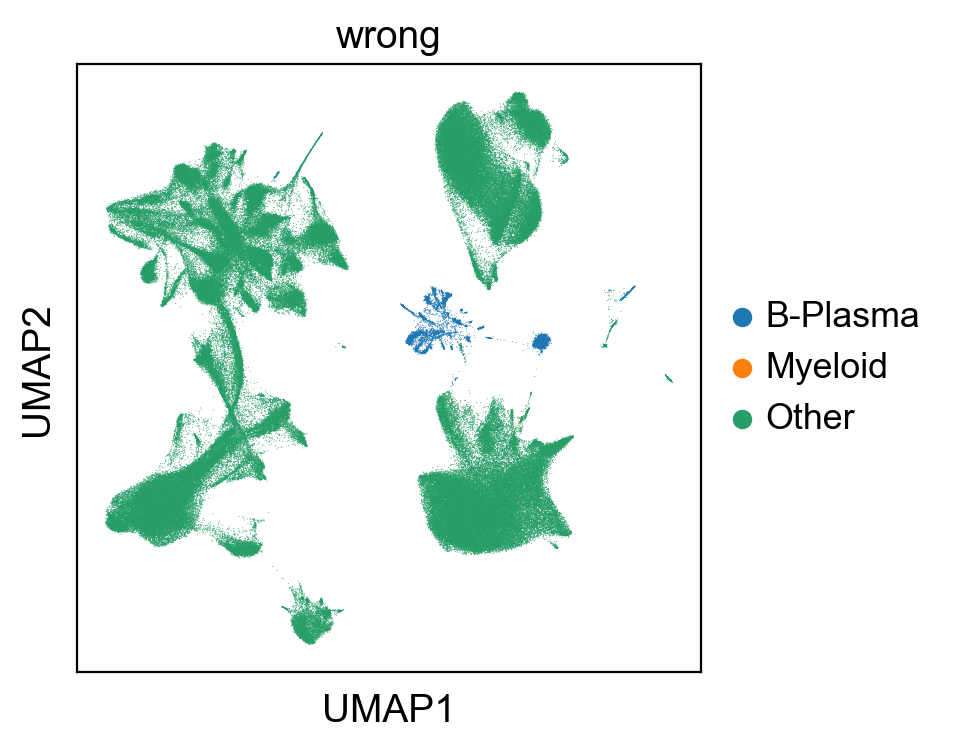

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/Users/ceglian/miniconda3/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y,

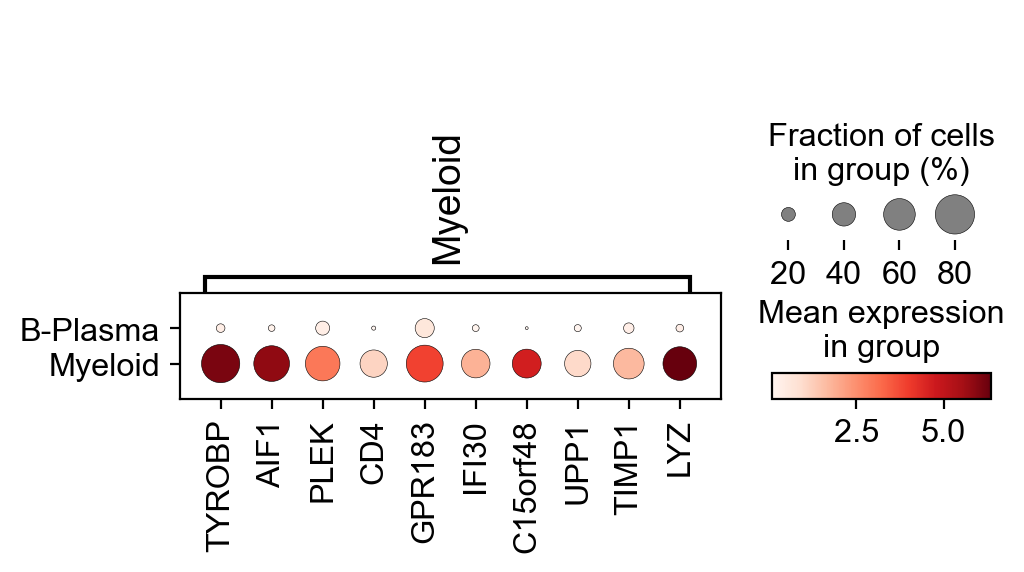

In [44]:
cts = []
rr = "B-Plasma"
tr = "Myeloid"
total = 0
wrong = 0
for x,y in zip(annotated_adata.obs["celltype"], 
                    annotated_adata.obs["genevector"]):
    if x==rr and y==tr:
        cts.append(tr)
        wrong += 1
    elif x == rr and y == rr:
        cts.append(rr)
    else:
        cts.append("Other")
    total += 1
annotated_adata.obs["wrong"] = cts
sc.pl.umap(annotated_adata,color="wrong",save="wrong.pdf")
subset = annotated_adata[annotated_adata.obs["wrong"].isin([rr,tr])]
sc.tl.rank_genes_groups(subset,"wrong")
sc.pl.rank_genes_groups_dotplot(subset, groups=[tr], n_genes=10, min_logfoldchange=2.5,save="miss.pdf")

/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


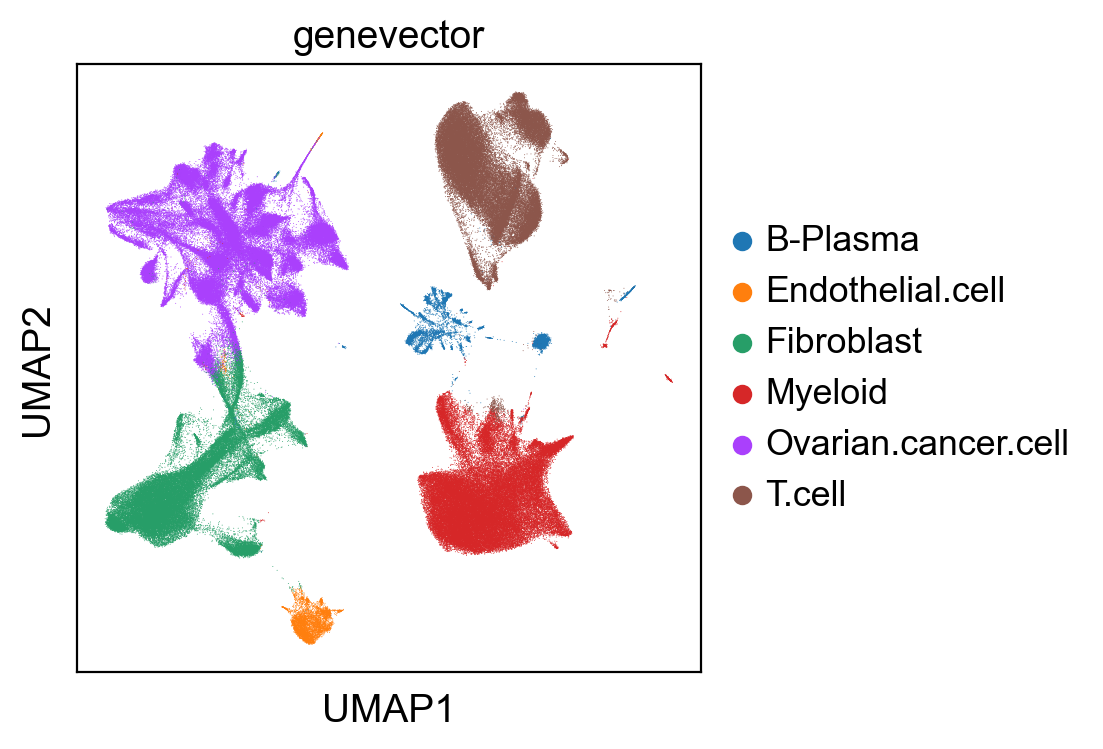

In [38]:
sc.pl.umap(annotated_adata,color="genevector",save="gv_spectrum.pdf")

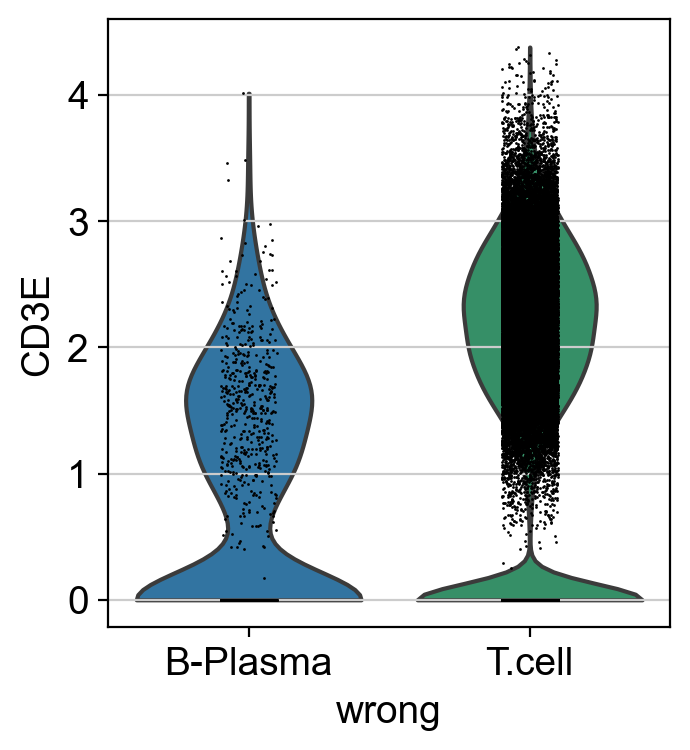

In [509]:
sc.pl.violin(subset,"CD3E",groupby="wrong",save="pt.pdf")

In [512]:
pats = []
for x in set(adata.obs["author_sample_id"]):
    pats.append(x.split("_")[0])
print(len(set(pats)))

26


In [511]:
len(set(adata.obs["author_sample_id"]))

75

In [514]:
cancer = annotated_adata[annotated_adata.obs["genevector"]=="Ovarian.cancer.cell"]
cancer

View of AnnData object with n_obs × n_vars = 87229 × 3000
    obs: 'percent.mt', 'percent.rb', 'doublet', 'author_sample_id', 'S.Score', 'G2M.Score', 'Phase', 'CC.Diff', 'author_cell_type', 'nCount_RNA', 'nFeature_RNA', 'doublet_score', 'cell_id', 'organism_ontology_term_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'suspension_type', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'author_tumor_supersite', 'author_tumor_site', 'author_tumor_subsite', 'author_sort_parameters', 'author_therapy', 'author_procedure', 'author_procedure_type', 'is_primary_data', 'site', 'celltype', 'genevector', 'wrong'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'author_cell_type_colors', 'hvg', 'neighbors', 'schema_version', 'title', 'umap', 'site_colors', 'rank_genes_groups', 'dendrogram_author_ce